# Assignment 2.1 - Clustering

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf. <br><br>
Please do **NOT** rename the file!

#### State both names of your group members here:
[S M Shameem Ahmed Khan and Rashid Harvey]

## Grading Info/Details - Assignment 2.1:

The assignment will be graded semi-automatically, which means that your code will be tested against a set of predefined test cases and qualitatively assessed by a human. This will speed up the grading process for us.

* For passing the test scripts: 
    - Please make sure to **NOT** alter predefined class or function names, as this would lead to failing of the test scripts.
    - Please do **NOT** rename the files before uploading to the Whiteboard!

* **(RESULT)** tags indicate checkpoints that will be specifically assessed by a human.

* You will pass the assignment if you pass the majority of test cases and we can at least confirm effort regarding the **(RESULT)**-tagged checkpoints per task.

## Task 2.1.1 - kMeans

kMeans is an unsupervised learning algorithm that partitions n observations into k clusters. Each observation belongs to the cluster with the nearest mean (cluster center or centroid).


### 1. kMeans Implementation
* Implement the kMeans clustering algorithm using `numpy` only. Use the `KMeans` class structure below. **(RESULT)**
* Test the convergence of your implementation by creating a 2D synthetic dataset yourself. Report on the convergence. **(RESULT)**

In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# inpired by https://medium.com/@juanc.olamendy/back-to-basics-mastering-k-means-clustering-with-numpy-ae7e6f1cb9a3
class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4, random_state=None):
        """
        Initialize KMeans clusterer.
        
        Parameters:
        -----------
        k : int
            Number of clusters
        max_iters : int
            Maximum number of iterations
        tol : float
            Tolerance for convergence (change in centroids)
        random_state : int or None
            Random seed for reproducibility
        """
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.labels_ = None
        self.report_convergence = False
    
    def initialize_centroids(self, X):
        """
        Initialize cluster centers using random selection from data points.
        """
        idx = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[idx]
    
    def initialize_centroids_plusplus(self, X): # for the following Subtask
        best_centroids = None
        best_loss = float("inf")

        tries = 10

        for t in range(tries):
            self.initialize_centroids(X)
            centroids = self.centroids

            # # compute loss = sum squared distance from each point to nearest centroid
            # diff_all = X[:, None, :] - centroids[None, :, :]
            # dists2 = np.sum(diff_all, axis=2)
            # min_dists2 = np.min(dists2, axis=1)
            # loss = np.sum(min_dists2)

            loss = self._calculate_loss(X)

            if loss < best_loss:
                best_loss = loss
                best_centroids = centroids.copy()

        self.centroids = best_centroids
    
    def fit(self, X):
        """
        Fit the KMeans model to data X.
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        for i in range(self.max_iters):
            distances = self._calculate_distances(X)
            labels = np.argmin(distances, axis=0)

            new_centroids = np.array([
                X[labels == i].mean(axis=0)
                for i in range(self.k)
            ])

            if all(
                np.linalg.norm(self.centroids[i] - new_centroids[i]) < self.tol
                for i in range(self.k)
            ): 
                if self.report_convergence:
                    print("Convergence:", i)
                break

            self.centroids = new_centroids

        self.labels_ = labels
    
    def predict(self, X):
        """
        Predict cluster labels for new data.
        """
        distances = self._calculate_distances(X)
        return np.argmin(distances, axis=0)
    
    def fit_predict(self, X):
        """
        Perform KMeans clustering and return cluster labels.
        """
        self.fit(X)
        return self.labels_
    
    def _calculate_distances(self, X):
        n = len(X)
        distances = np.zeros((self.k, n))

        for i in range(n):
            diff = self.centroids - X[i]
            distances[:, i] = np.linalg.norm(diff, axis=1)

        return distances

    def _calculate_loss(self, X):
        distances = self._calculate_distances(X)

        return np.sum(
            np.min(distances, axis=0)
        )

In [89]:
n = 10
data_range = 100

dataset = []

for _ in range(n):
    dataset.append(
        [np.random.randint(0, data_range), np.random.randint(0, data_range)]
    )

dataset = np.array(dataset)

kmeans = KMeans()

kmeans.report_convergence = True

kmeans.initialize_centroids(dataset)
kmeans.fit(dataset)

Convergence: 1


### 2. kMeans++ initialization

* Implement the kMeans++ initialization method in the KMeans class. **(RESULT)**
* Compare the convergence speed of kMeans with random initialization and kMeans++ initialization on your synthetic dataset from Part 1. **(RESULT)**

In [90]:

print("Normal init")

kmeans = KMeans()

kmeans.report_convergence = True

kmeans.initialize_centroids(dataset)
kmeans.fit(dataset)

print("init ++")
kmeans_plus = KMeans()

kmeans.report_convergence = True

kmeans.initialize_centroids_plusplus(dataset)
kmeans.fit(dataset)

Normal init
Convergence: 1
init ++
Convergence: 2


### 3. Visualization of Cluster Quality


* Visualize the clustering results of your kMeans implementation on a synthetic 2D dataset with at least 4 clusters using matplotlib. **(RESULT)**
* Determine the optimal number of clusters using the elbow method. Report on your findings using a simple plot. **(RESULT)**
* Report on the silhouette score of your clustering results for the optimal k and k-1. **(RESULT)**

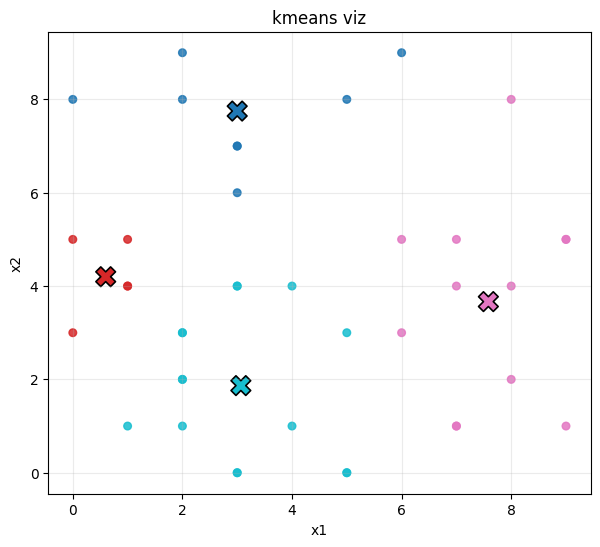

In [91]:
# Visualization helper for a given dataset and a fitted KMeans object
def visualize_kmeans(X, kmeans, title="kmeans viz", show_centroids=True, cmap='tab10'):

    labels = kmeans.labels_

    plt.figure(figsize=(7, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, s=30, alpha=0.85)

    if show_centroids and hasattr(kmeans, 'centroids') and kmeans.centroids is not None:
        cent = np.asarray(kmeans.centroids)
        if cent.size and cent.shape[1] == 2:
            # Color centroids to match cluster colors by giving them the same label indices
            centroid_labels = np.arange(len(cent))
            plt.scatter(
                cent[:, 0], cent[:, 1],
                c=centroid_labels,
                cmap=cmap,
                s=200,
                marker='X',
                edgecolors='k',
                linewidths=1.2,
                label='centroids'
            )

    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(alpha=0.25)
    plt.show()

n = 40
data_range = 10

dataset = []

for _ in range(n):
    dataset.append(
        [np.random.randint(0, data_range), np.random.randint(0, data_range)]
    )

dataset = np.array(dataset)

kmeans = KMeans(k=4)

kmeans.initialize_centroids_plusplus(dataset)
kmeans.fit(dataset)

visualize_kmeans(dataset, kmeans)

# # Optional: silhouette score if sklearn is installed and labels are available
# try:
#     from sklearn.metrics import silhouette_score
#     if hasattr(kmeans, 'labels_'):
#         print('Silhouette score:', silhouette_score(dataset, kmeans.labels_))
# except Exception:
#     pass

In [ ]:
# Elbow method



## Task 2.1.2 - DBSCAN (BONUS)

DBSCAN is a density-based clustering algorithm that groups together points that are closely packed together, marking outliers points that lie alone in low-density regions.

* Implement the DBSCAN algorithm using `numpy` only. Use the `DBSCAN` class structure below. **(RESULT)**
* Test your DBSCAN implementation on a synthetic 2D dataset with noise. Visualize the clustering results using matplotlib. **(RESULT)**
* Compare the performance of your DBSCAN implementation with your kMeans implementation on the same synthetic 2D dataset using silhouette score as a metric. Please use the same random seed to make it comparable. **(RESULT)**


In [92]:
from collections import deque   # Useful for efficient BFS implementation for finding neighbors

class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5, metric='euclidean'):
        """
        Parameters:
        -----------
        eps : float
            Maximum distance between two samples for them to be considered neighbors
        min_samples : int
            Number of samples in a neighborhood for a point to be considered a core point
            (including the point itself)
        metric : str
            Distance metric to use ('euclidean' or 'manhattan')
        """
        self.eps = eps
        self.min_samples = min_samples
        self.metric = metric
        self.labels_ = None
        self.core_sample_indices_ = None
        self.components_ = None
        self.n_clusters_ = None
        self.n_noise_ = None
    
    def fit(self, X):
        """
        Perform DBSCAN clustering.
        """
        # TODO: Implement this function
        pass
    
    def predict(self, X_new):
        """
        Predict the closest cluster for new points.
        Note: New points can only be assigned to existing clusters or marked as noise.
        """
        # TODO: Implement this function
        pass
    
    def fit_predict(self, X):
        """
        Perform DBSCAN clustering and return cluster labels.
        
        """
        self.fit(X)
        return self.labels_

## Congratz, you made it! :)